# Análisis Estados Financieros - Caso Colanta

A continuación se mostrará el análisis de los estados financieros de la Cooperativa Colanta para los años 2019 a 2023

In [1]:
# Importamos librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargamos el archivo con los estados financieros
archivo = "Company_financials__1189953.xlsx"
df = pd.read_excel(archivo, header = None)
# Visualizamos la información
#df.head(15)

In [3]:
# Eliminamos las primeras 12 filas que no son informativas
df = df.iloc[12:]
# Tomamos la primera fila como el nombre de las columnas
df.columns = df.iloc[0]
# Eliminamos la primera fila para que los nombres no queden repetidos
df = df[1:]

In [4]:
# ahora vamos a gestionar los datos nulos del final de la tabla
# en este caso, eliminaremos las filas para las cuales
# todos los años sean NA
df = df.dropna(subset = ['2023 ', '2022 ', '2021 ', 
                        '2020 ', '2019 '], how = 'all')
# revisamos la información
df.tail()

12,Estado de Resultados,2023,2022,2021,2020,2019
75,Fecha inicial del periodo de reporte,2023-01-01,2023-01-01,2021-01-01,2020-01-01,2019-01-01
76,Fecha final del período,2023-12-31,2023-12-31,2021-12-31,2020-12-31,2019-12-31
77,Unidades originales como se reportó,COP Miles,COP Miles,COP Miles,COP Miles,COP Miles
78,Auditado,Auditado,Auditado,Auditado,Auditado,Auditado
79,Fuente,Supersolidaria - Estados Financieros,Supersolidaria - Estados Financieros,Supersolidaria - Estados Financieros,Supersolidaria - Estados Financieros,Supersolidaria - Estados Financieros


In [5]:
# Vamos a resetear el índice
df.reset_index(drop = True, inplace = True)

# Visualizamos los cambios
df.head()

12,Estado de Resultados,2023,2022,2021,2020,2019
0,Total Ingreso Operativo,3755772.14,3453647.73,2912991.31,2511670.71,2313764.88
1,Ingresos netos por ventas,3723244.41,3408406.47,2894139.51,2473327.16,2292774.79
2,Costo de mercancías vendidas,-3136435.64,-2959235.79,-2496743.97,-2111472.35,-1931891.42
3,Utilidad bruta,586808.77,449170.68,397395.54,361854.81,360883.37
4,Gastos de venta y distribución,-429894.63,-364396.83,-335402.85,-312912.94,-298610.74


In [6]:
# Para el análisis calcularemos varias métricas
# 1. Variación de la utilidad bruta del 2022 y el 2023

utilidad_2023 = df[df['Estado de Resultados '].\
                   str.contains('utilidad bruta', case = False)]['2023 '].values[0]
utilidad_2022 = df[df['Estado de Resultados '].\
                  str.contains('utilidad bruta', case = False)]['2022 '].values[0]

In [7]:
variacion = utilidad_2023 - utilidad_2022
print(f"La variación de la utilidad bruta entre  2023 y 2022 es de COP${variacion}")

La variación de la utilidad bruta entre  2023 y 2022 es de COP$137638.09000000003


In [8]:
# 2. Graficamos la Utilidad bruta para todos los años
utilidad = df[df['Estado de Resultados '].str.contains('utilidad bruta',
                                                      case = False)].iloc[0,1:]

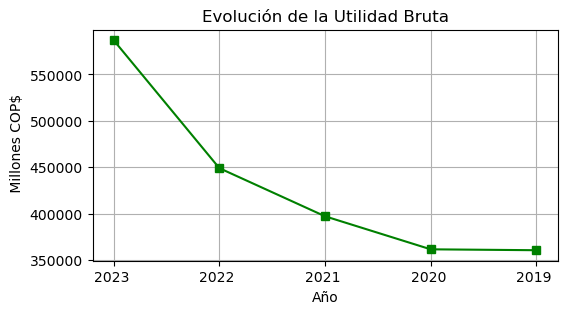

In [9]:
# Cambiamos el tamaño de la figura
plt.figure(figsize = (6,3))
plt.plot(utilidad.index, utilidad.values, marker = "s", color =  "green")
plt.title('Evolución de la Utilidad Bruta')
plt.xlabel('Año')
plt.ylabel(' Millones COP$')
plt.grid(True)
plt.show()

In [10]:
# 3. Graficamos los ingresos  y  la utilidad bruta 

ingresos = df[df["Estado de Resultados "].\
              str.contains("Ingreso operativo", case = False)].iloc[0,1:]

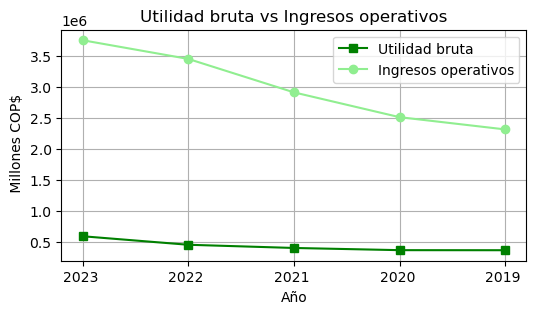

In [11]:
# Cambiamos el tamaño de la figura
plt.figure(figsize = (6,3))
plt.plot(utilidad.index, utilidad.values, marker = "s", color =  "green",
        label = "Utilidad bruta")
plt.plot(ingresos.index, ingresos.values, marker = "o", color = "lightgreen",
        label = "Ingresos operativos")
plt.title('Utilidad bruta vs Ingresos operativos')
plt.xlabel('Año')
plt.ylabel(' Millones COP$')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# 4. Utilidad bruta vs utilidad neta
neta = df[df['Estado de Resultados '].\
              str.contains('neta', case = False)].iloc[0,1:]

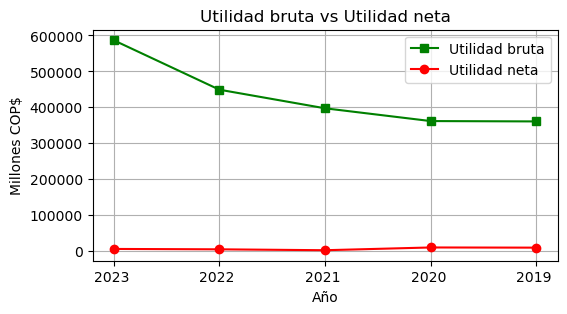

In [13]:
# Cambiamos el tamaño de la figura
plt.figure(figsize = (6,3))
plt.plot(utilidad.index, utilidad.values, marker = "s", color =  "green",
        label = "Utilidad bruta")
plt.plot(neta.index, neta.values, marker = "o", color = "red",
        label = "Utilidad neta")
plt.title('Utilidad bruta vs Utilidad neta')
plt.xlabel('Año')
plt.ylabel('Millones COP$')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# 5. Calculamos la rentabilidad para cada uno de los años
# Creamos una tabla vacía
rentabilidad = pd.DataFrame()

# Recorremos todos los años con un ciclo para
# calcular la rentabilidad para cada uno ellos
for año in ['2023 ', '2022 ', '2021 ', '2020 ', '2019 ']:
    utilidad = df[df['Estado de Resultados '].str.contains('utilidad bruta',
                                                      case = False)][año].values[0]
    ingresos = df[df['Estado de Resultados '].str.contains('ingresos',
                                                      case = False)][año].values[0]
    neta = df[df['Estado de Resultados '].str.contains('neta',
                                                      case = False)][año].values[0]
    rentabilidad.loc['Rentabilidad', año] = utilidad/ingresos
    rentabilidad.loc['Margen Bruto', año] = neta/ingresos


In [15]:
rentabilidad

,2023,2022,2021,2020,2019
Rentabilidad,0.157607,0.131783,0.137310,0.146303,0.157400
Margen Bruto,0.001629,0.001469,0.000863,0.004112,0.004223


In [16]:
# Realizamos un diagrama de barras vertical para comparar las 
# diferentes cuentas relacionadas con los gastos

# Primero identificamos los gastos
gastos = df[df['Estado de Resultados '].str.contains('gasto', 
                                                     case = False)]

In [17]:
# Segundo fijamos el índice para que cada fila
# se identifique con el nombre de la cuenta
gastos.set_index('Estado de Resultados ', inplace = True)

In [18]:
# Totalizamos los gastos que corresponden al periodo 2023
total_gastos = gastos.loc[:, '2023 '].sum()

In [19]:
# Calculamos la participación de cada cuenta en el total del
# periodo
participacion = (gastos['2023 ']/total_gastos)*100

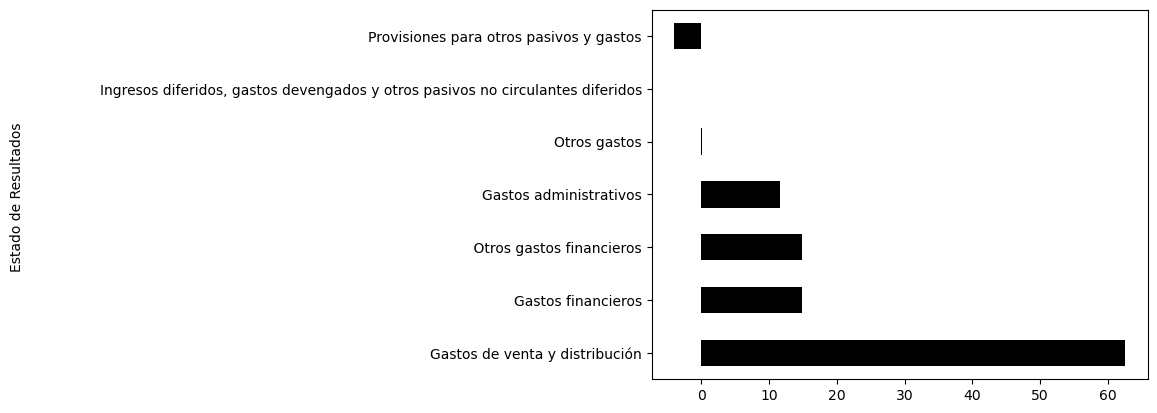

In [20]:
# Ordenamos los valores y graficamos
participacion.sort_values(ascending = False).plot(kind = 'barh',
                                                 color = 'black');

In [21]:
# Vamos a categorizar las cuentas de acuerdo a si 
# son ingresos, costos, gastos y utilidades

# Hacemos una función que resuma las cuentas

def clasificar(cuenta):
    # primero llevamos el nombre de la cuenta a minúsculas
    cuenta = cuenta.lower()
    # evaluamos los posibles casos
    if 'ingreso' in cuenta:
        return 'Ingresos'
    elif 'costo' in cuenta:
        return 'Costos'
    elif 'gasto' in cuenta:
        return 'Gastos'
    elif 'utilidad' in cuenta:
        return 'Resultado'
    else:
        return 'Otros'
    

In [22]:
# Creamos la columna Categoría
df['Categoría'] = df['Estado de Resultados '].apply(clasificar)

In [23]:
datos = df[['Estado de Resultados ', 'Categoría', '2023 ', '2022 ', '2021 ']]

In [24]:
# Debemos conservar solo hasta la fila 56
datos = datos[:57]

In [25]:
datos[datos['Estado de Resultados '] == 'Balance General ']

12,Estado de Resultados,Categoría,2023,2022,2021
17,Balance General,Otros,2023,2022,2021


In [26]:
# Debemos eliminar la fila 17
datos.drop(17, axis = 0, inplace = True)

In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 0 to 56
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Estado de Resultados   56 non-null     object
 1   Categoría              56 non-null     object
 2   2023                   56 non-null     object
 3   2022                   56 non-null     object
 4   2021                   56 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB


In [28]:
# Ahora utilizamos la nueva columna para agrupar por categoría
# los valores por periodo
resultados = datos.groupby('Categoría')[['2023 ', '2022 ', '2021 ']].sum()

In [48]:
resultados_numericos = resultados.apply(pd.to_numeric, errors='coerce')


In [49]:
resultados_numericos

12,2023,2022,2021
Categoría,,,
Costos,-3136435.64,-2959235.79,-2496743.97
Gastos,-687871.29,-511831.77,-413553.10
Ingresos,7511544.29,6907295.45,5825997.13
Otros,14717719.01,13397678.34,12425142.55
Resultado,586808.77,449170.68,397395.54


In [53]:
resultados_numericos.loc['Resultado', :].idxmax()

'2023 '